In [30]:
import requests
import json

symbol = "AAPL"
api_key = "E5Z5NHRB8ZYUI62W"

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=compact&apikey={api_key}"

response = requests.get(url).json()

print(response)


{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-12-05', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-12-05': {'1. open': '280.5400', '2. high': '281.1400', '3. low': '278.0500', '4. close': '278.7800', '5. volume': '47234255'}, '2025-12-04': {'1. open': '284.0950', '2. high': '284.7300', '3. low': '278.5900', '4. close': '280.7000', '5. volume': '43989056'}, '2025-12-03': {'1. open': '286.2000', '2. high': '288.6200', '3. low': '283.3000', '4. close': '284.1500', '5. volume': '43538687'}, '2025-12-02': {'1. open': '283.0000', '2. high': '287.4000', '3. low': '282.6301', '4. close': '286.1900', '5. volume': '53669532'}, '2025-12-01': {'1. open': '278.0100', '2. high': '283.4200', '3. low': '276.1400', '4. close': '283.1000', '5. volume': '46587722'}, '2025-11-28': {'1. open': '277.2600', '2. high': '279.0000', '3. low': '275.9865', '4. close': '278.8500', '5

In [31]:
import requests
import pandas as pd

symbol = "AAPL"
api_key = "E5Z5NHRB8ZYUI62W"

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=compact&apikey={api_key}"

response = requests.get(url).json()

# Check if key exists
if "Time Series (Daily)" not in response:
    print("Error: API did not return time series data")
    print(response)
else:
    data = response["Time Series (Daily)"]

    # Convert nested dict → DataFrame
    df = pd.DataFrame(data).T

    # Fix date index
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    # Rename columns
    df.columns = ["Open", "High", "Low", "Close", "Volume"]

    # Convert strings to floats
    df = df.astype(float)

    print("Data loaded successfully:")
    print(df.head())


Data loaded successfully:
              Open    High       Low   Close      Volume
2025-07-17  210.57  211.80  209.5900  210.02  48068141.0
2025-07-18  210.87  211.79  209.7045  211.18  48974591.0
2025-07-21  212.10  215.78  211.6300  212.48  51377434.0
2025-07-22  213.14  214.95  212.2301  214.40  46404072.0
2025-07-23  215.00  215.15  212.4100  214.15  46989301.0


In [32]:
# STEP 2 — Data Cleaning

# Check for missing values
print("Missing values per column:")
print(df.isna().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Reset index (optional but clean)
df = df.reset_index().rename(columns={"index": "Date"})

print("\nCleaned DataFrame:")
df.head()


Missing values per column:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Cleaned DataFrame:


,Date,Open,High,Low,Close,Volume
0,2025-07-17,210.57,211.80,209.5900,210.02,48068141.0
1,2025-07-18,210.87,211.79,209.7045,211.18,48974591.0
2,2025-07-21,212.10,215.78,211.6300,212.48,51377434.0
3,2025-07-22,213.14,214.95,212.2301,214.40,46404072.0
4,2025-07-23,215.00,215.15,212.4100,214.15,46989301.0


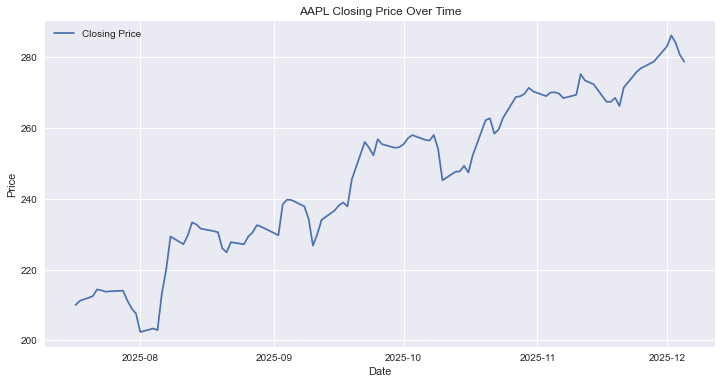

In [33]:
#Plot Closing Price Trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Closing Price")
plt.title(f"{symbol} Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


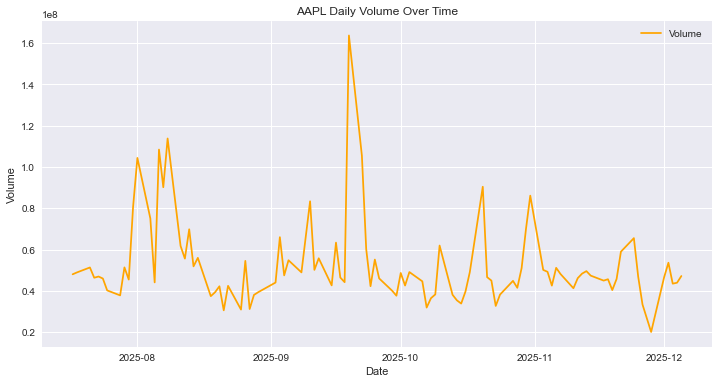

In [34]:
#Plot Volume Trend
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Volume"], color="orange", label="Volume")
plt.title(f"{symbol} Daily Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()


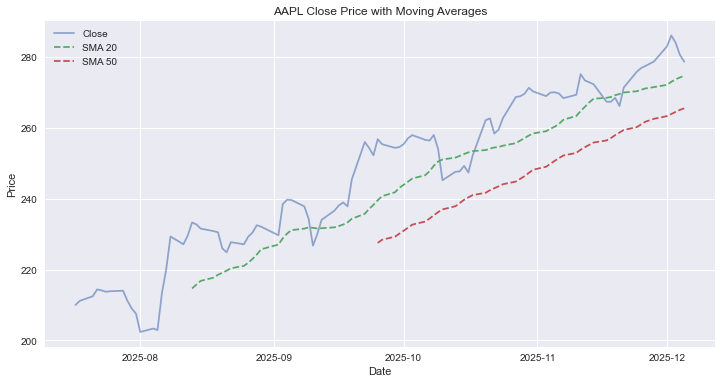

In [35]:
#Add Moving Averages (SMA20, SMA50)
df["SMA20"] = df["Close"].rolling(window=20).mean()
df["SMA50"] = df["Close"].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close", alpha=0.6)
plt.plot(df["Date"], df["SMA20"], label="SMA 20", linestyle="--")
plt.plot(df["Date"], df["SMA50"], label="SMA 50", linestyle="--")
plt.title(f"{symbol} Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


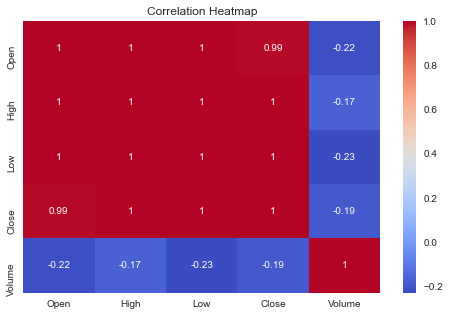

In [36]:
#Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(df[["Open","High","Low","Close","Volume"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [37]:
#Add Daily Returns
df["Returns"] = df["Close"].pct_change()


In [38]:
#Add RSI (Relative Strength Index)
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df["RSI"] = compute_rsi(df["Close"])


In [39]:
#Add MACD (Trend Indicator)
df["EMA12"] = df["Close"].ewm(span=12, adjust=False).mean()
df["EMA26"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA12"] - df["EMA26"]
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()


In [40]:
#Add Bollinger Bands (Volatility Indicator)
df["BB_Middle"] = df["Close"].rolling(window=20).mean()
df["BB_Std"] = df["Close"].rolling(window=20).std()
df["BB_Upper"] = df["BB_Middle"] + (df["BB_Std"] * 2)
df["BB_Lower"] = df["BB_Middle"] - (df["BB_Std"] * 2)


In [41]:
#Add Lag Features (Very important for XGBoost)
df["Lag1"] = df["Close"].shift(1)
df["Lag2"] = df["Close"].shift(2)
df["Lag3"] = df["Close"].shift(3)


In [42]:
#Drop rows with NaN created by indicators
df = df.dropna()
df = df.reset_index(drop=True)
df.head()


,Date,Open,High,Low,Close,Volume,SMA20,SMA50,Returns,RSI,...,EMA26,MACD,Signal,BB_Middle,BB_Std,BB_Upper,BB_Lower,Lag1,Lag2,Lag3
0,2025-09-25,253.205,257.170,251.712,256.87,55202075.0,239.6195,227.5418,0.018073,66.287448,...,238.459405,7.192762,5.509429,239.6195,8.946889,257.513277,221.725723,252.31,254.43,256.08
1,2025-09-26,254.095,257.600,253.780,255.46,46076258.0,240.7645,228.4506,-0.005489,66.794039,...,239.718708,7.442356,5.896014,240.7645,9.447233,259.658965,221.870035,256.87,252.31,254.43
2,2025-09-29,254.560,255.000,253.010,254.43,40127687.0,241.8790,229.3156,-0.004032,70.144462,...,240.808434,7.470929,6.210997,241.8790,9.687962,261.254924,222.503076,255.46,256.87,252.31
3,2025-09-30,254.855,255.919,253.110,254.63,37704259.0,243.1245,230.1586,0.000786,82.768362,...,241.832253,7.424130,6.453624,243.1245,9.643642,262.411785,223.837215,254.43,255.46,256.87
4,2025-10-01,255.040,258.790,254.930,255.45,48713940.0,243.9735,230.9796,0.003220,81.727409,...,242.840975,7.368272,6.636554,243.9735,9.954725,263.882950,224.064050,254.63,254.43,255.46


In [43]:
#Train/Test Split (Time-Based)
from sklearn.model_selection import train_test_split

# Select features (everything except Date and Close)
feature_cols = [
    "Open", "High", "Low", "Volume", 
    "Returns", "RSI", "EMA12", "EMA26", 
    "MACD", "Signal",
    "BB_Middle", "BB_Std", "BB_Upper", "BB_Lower",
    "Lag1", "Lag2", "Lag3"
]

X = df[feature_cols]
y = df["Close"]

# Time-based split (80% train, 20% test)
split_index = int(len(df) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 40
Testing samples: 11


In [44]:
import pandas as pd

# Create a time series with Date as index
ts = df.set_index("Date")["Close"]

ts.head()


Date
2025-09-25    256.87
2025-09-26    255.46
2025-09-29    254.43
2025-09-30    254.63
2025-10-01    255.45
Name: Close, dtype: float64

In [45]:
from statsmodels.tsa.stattools import adfuller #Check Stationarity (Dickey–Fuller Test)

result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -0.8051278283622447
p-value: 0.8176111642260595


In [46]:
ts_diff = ts.diff().dropna()#Make Series Stationary


In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(5,1,2)
model = ARIMA(ts, order=(5, 1, 2))
model_fit = model.fit()

print(model_fit.summary())


/Users/anujatalekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anujatalekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anujatalekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anujatalekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   51
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -121.001
Date:                Fri, 05 Dec 2025   AIC                            258.002
Time:                        21:13:16   BIC                            273.298
Sample:                             0   HQIC                           263.827
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8751      0.270     -3.236      0.001      -1.405      -0.345
ar.L2         -0.7674      0.234     -3.284      0.001      -1.225      -0.309
ar.L3          0.0498      0.258      0.193      0.8

In [48]:
# Number of test samples
n_test = len(y_test)

# Forecast
forecast = model_fit.forecast(steps=n_test)

print(forecast.head())


51    279.709882
52    281.196625
53    279.348792
54    279.559018
55    280.307508
Name: predicted_mean, dtype: float64


/Users/anujatalekar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [49]:
import numpy as np

arima_pred = pd.Series(forecast.values, index=y_test.index)


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, arima_pred))
mae = mean_absolute_error(y_test, arima_pred)

print("ARIMA RMSE:", rmse)
print("ARIMA MAE:", mae)


ARIMA RMSE: 5.831416231233808
ARIMA MAE: 4.299206830130495


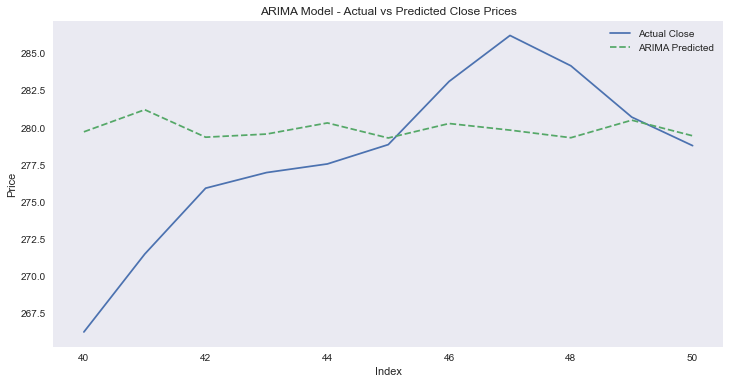

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Close")
plt.plot(y_test.index, arima_pred, label="ARIMA Predicted", linestyle="--")
plt.title("ARIMA Model - Actual vs Predicted Close Prices")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
